# Multivariate Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator
import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sktime.classification.compose import ComposableTimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sktime.utils.slope_and_trend import _slope

from sklearn.metrics import plot_confusion_matrix

import csv

In [2]:
#Train and test dataset without features
X_train, y_train = load_from_tsfile_to_dataframe("haptic_data_3.ts", replace_missing_vals_with='NaN')
X_test, y_test = load_from_tsfile_to_dataframe("haptic_data_4.ts", replace_missing_vals_with='NaN')


In [10]:
#Train and test dataset with features
X_train_f, y_train_f = load_from_tsfile_to_dataframe("haptic_data_7.ts", replace_missing_vals_with='NaN')
X_test_f, y_test_f = load_from_tsfile_to_dataframe("haptic_data_8.ts", replace_missing_vals_with='NaN')

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train_f.shape, y_train_f.shape, X_test_f.shape, y_test_f.shape)

(156, 4) (156,) (63, 4) (63,)
(158, 9) (158,) (63, 9) (63,)


In [5]:
X_train.head()

,dim_0,dim_1,dim_2,dim_3
0,0 0.009901 1 0.028431 2 0...,0 0.020382 1 0.059299 2 0.09...,0 1.031202e-02 1 4.378524e-02 2 ...,0 0.00000 1 0.00000 2 0.0015...
1,0 0.008854 1 0.026425 2 0...,0 0.018237 1 0.055137 2 0.09...,0 8.536517e-03 1 3.977109e-02 2 ...,0 0.000 1 0.000 2 0.000 3 ...
2,0 0.011421 1 0.030659 2 0...,0 0.023252 1 0.063659 2 0.10...,0 1.243081e-02 1 4.802942e-02 2 ...,0 0.000 1 0.000 2 0.000 3 ...
3,0 0.008961 1 0.026472 2 0...,0 0.018321 1 0.055094 2 0.09...,0 8.602617e-03 1 3.972703e-02 2 ...,0 0.00 1 0.00 2 0.00 3 ...
4,0 0.008880 1 0.026535 2 0...,0 0.020910 1 0.063280 2 0.10...,0 0.009823 1 0.045712 2 0.08...,0 0.000 1 0.000 2 0.000 3 ...


In [6]:
X_train_f.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8
0,0 0.009901 1 0.028431 2 0...,0 0.020382 1 0.059299 2 0.09...,0 1.031202e-02 1 4.378524e-02 2 ...,0 0.00000 1 0.00000 2 0.0015...,0 0.000000 1 -0.000550 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
1,0 0.008854 1 0.026425 2 0...,0 0.018237 1 0.055137 2 0.09...,0 8.536517e-03 1 3.977109e-02 2 ...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000467 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
2,0 0.011421 1 0.030659 2 0...,0 0.023252 1 0.063659 2 0.10...,0 1.243081e-02 1 4.802942e-02 2 ...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000659 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
3,0 0.008961 1 0.026472 2 0...,0 0.018321 1 0.055094 2 0.09...,0 8.602617e-03 1 3.972703e-02 2 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000471 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
4,0 0.008880 1 0.026535 2 0...,0 0.020910 1 0.063280 2 0.10...,0 0.009823 1 0.045712 2 0.08...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000470 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...


In [7]:
print(np.unique(y_train))
print(np.unique(y_train_f))

['orange' 'tomato']
['orange' 'tomato']


In [10]:
y_test_f

array(['orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'orange', 'orange', 'orange', 'orange', 'orange',
       'orange', 'tomato', 'tomato', 'tomato', 'tomato', 'tomato',
       'tomato', 'tomato', 'tomato', 'tomato', 'tomato', 'tomato',
       'tomato', 'tomato', 'tomato', 'tomato', 'tomato', 'tomato',
       'tomato', 'tomato', 'tomato', 'tomato', 'tomato', 'tomato',
       'tomato', 'tomato', 'tomato', 'tomato', 'tomato', 'tomato',
       'tomato', 'tomato', 'tomato'], dtype='<U6')

# TimeSeriesForestClassifier

## Without features

In [15]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.873015873015873

In [16]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      orange       0.87      0.87      0.87        31
      tomato       0.88      0.88      0.88        32

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



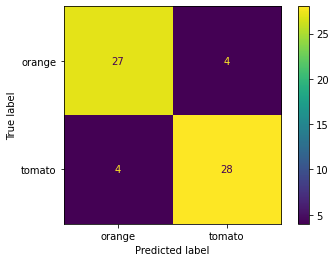

In [17]:
plot_confusion_matrix(clf, X_test, y_test)

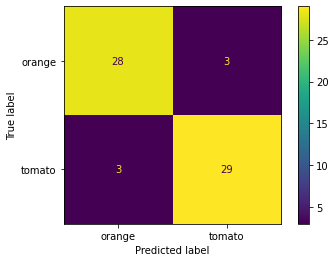

In [12]:
cm = plot_confusion_matrix(clf, X_test, y_test)
cm.figure_.savefig('conf_mat_no_features_isolated_dataset.png',dpi=300)

## with features

In [18]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f, y_train_f)
clf.score(X_test_f, y_test_f)

0.9682539682539683

In [19]:
print(classification_report(y_test_f, clf.predict(X_test_f)))

              precision    recall  f1-score   support

      orange       0.97      0.97      0.97        31
      tomato       0.97      0.97      0.97        32

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63



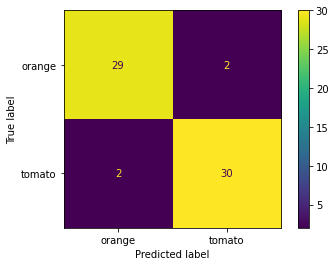

In [19]:
plot_confusion_matrix(clf, X_test_f, y_test_f)

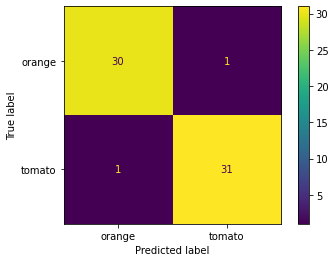

In [16]:
cm = plot_confusion_matrix(clf, X_test_f, y_test_f)
cm.figure_.savefig('conf_mat_with_features_isolated_dataset.png',dpi=300)

# BOSSEnsemble & ColumnEnsembleClassifier

In [9]:
clf = ColumnEnsembleClassifier(estimators=[("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3]),])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7619047619047619

In [10]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      orange       0.74      0.81      0.77        31
      tomato       0.79      0.72      0.75        32

    accuracy                           0.76        63
   macro avg       0.76      0.76      0.76        63
weighted avg       0.76      0.76      0.76        63



# BOSSEnsemble & ColumnEnsembleClassifier - with features

clf = ColumnEnsembleClassifier(estimators=[("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3]),])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)---

In [20]:
clf = ColumnEnsembleClassifier(estimators=[("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3]),])
clf.fit(X_train_f, y_train_f)
clf.score(X_test_f, y_test_f)

0.746031746031746

In [21]:
print(classification_report(y_test, clf.predict(X_test_f)))

              precision    recall  f1-score   support

      orange       0.74      0.74      0.74        31
      tomato       0.75      0.75      0.75        32

    accuracy                           0.75        63
   macro avg       0.75      0.75      0.75        63
weighted avg       0.75      0.75      0.75        63



---

# MrSEQLClassifier - univareate time serial classification not sutalble

In [96]:
clf = MrSEQLClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [99]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [101]:
# Cannot plot confution matrix
# plot_confusion_matrix(clf, X_test, y_test)

# Plot 

In [11]:
# binary target variable
labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['banana' 'orange'] [12 12]


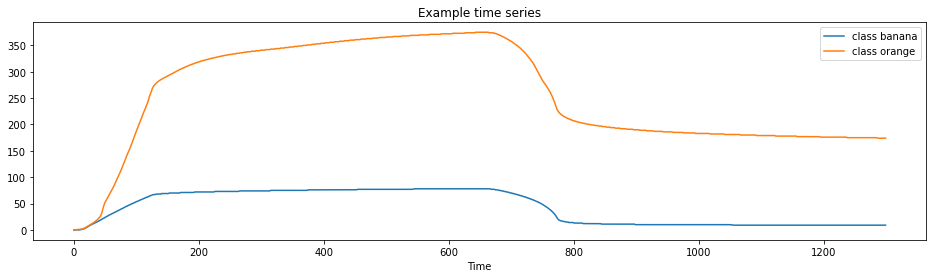

In [18]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    X_train.loc[y_train == label, "dim_3"].iloc[0].plot(ax=ax, label=f"class {label}")
plt.legend()
ax.set(title="Example time series", xlabel="Time");

## Feature extraction with sklearn

In [53]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

from sklearn.pipeline import make_pipeline
# with sktime, we can write this as a pipeline
from sktime.transformations.panel.reduce import Tabularizer
from sklearn.ensemble import RandomForestClassifier
from sktime.datatypes._panel._convert import from_nested_to_2d_array

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [64]:
# for univariate tdata this works 

#time_series_tree.fit(X_train, y_train)
#time_series_tree.score(X_test, y_test)

In [45]:
t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
Xtrain = t.fit_transform(X_train)
Xtest = t.fit_transform(X_test)

Xtrain.head()

Feature Extraction: 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


,dim_0__variance_larger_than_standard_deviation,dim_0__has_duplicate_max,dim_0__has_duplicate_min,dim_0__has_duplicate,dim_0__sum_values,dim_0__abs_energy,dim_0__mean_abs_change,dim_0__mean_change,dim_0__mean_second_derivative_central,dim_0__median,...,dim_3__fourier_entropy__bins_2,dim_3__fourier_entropy__bins_3,dim_3__fourier_entropy__bins_5,dim_3__fourier_entropy__bins_10,dim_3__fourier_entropy__bins_100,dim_3__permutation_entropy__dimension_3__tau_1,dim_3__permutation_entropy__dimension_4__tau_1,dim_3__permutation_entropy__dimension_5__tau_1,dim_3__permutation_entropy__dimension_6__tau_1,dim_3__permutation_entropy__dimension_7__tau_1
0,1.0,0.0,0.0,0.0,19378.299766,385719.044982,0.022964,0.022964,-2.023571e-07,14.899659,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.632483,0.823734,0.992637,1.146368,1.286073
1,1.0,0.0,0.0,0.0,19399.704880,386472.250313,0.022988,0.022988,-4.665996e-07,14.920211,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.822398,1.075686,1.268945,1.439496,1.589333
2,1.0,0.0,0.0,0.0,19544.830522,392358.198959,0.023126,0.023126,-4.901637e-08,15.073735,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.842623,1.090994,1.268684,1.429784,1.571572
3,1.0,0.0,0.0,0.0,19566.785652,393337.642628,0.023157,0.023157,-6.531864e-07,15.069535,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.822892,1.051292,1.215162,1.366163,1.503596
4,1.0,0.0,0.0,0.0,19524.785807,391290.401356,0.023136,0.023136,-3.488946e-07,15.005463,...,0.045395,0.045395,0.045395,0.125256,0.181214,0.645657,0.847281,1.019614,1.173998,1.313434


In [67]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(Xtrain, y_train, test_size=.2)


In [73]:
X_train_fs

,dim_0__variance_larger_than_standard_deviation,dim_0__has_duplicate_max,dim_0__has_duplicate_min,dim_0__has_duplicate,dim_0__sum_values,dim_0__abs_energy,dim_0__mean_abs_change,dim_0__mean_change,dim_0__mean_second_derivative_central,dim_0__median,...,dim_3__fourier_entropy__bins_2,dim_3__fourier_entropy__bins_3,dim_3__fourier_entropy__bins_5,dim_3__fourier_entropy__bins_10,dim_3__fourier_entropy__bins_100,dim_3__permutation_entropy__dimension_3__tau_1,dim_3__permutation_entropy__dimension_4__tau_1,dim_3__permutation_entropy__dimension_5__tau_1,dim_3__permutation_entropy__dimension_6__tau_1,dim_3__permutation_entropy__dimension_7__tau_1
6,1.0,0.0,0.0,0.0,19721.304000,398994.789642,0.023296,0.023296,-4.790636e-07,15.220156,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.813147,1.034359,1.213644,1.378383,1.521543
15,1.0,0.0,0.0,0.0,19558.433745,392991.128307,0.023157,0.023157,-8.878914e-07,15.065692,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.666204,0.857939,1.014788,1.150327,1.267684
4,1.0,0.0,0.0,0.0,19524.785807,391290.401356,0.023136,0.023136,-3.488946e-07,15.005463,...,0.045395,0.045395,0.045395,0.125256,0.181214,0.645657,0.847281,1.019614,1.173998,1.313434
10,1.0,0.0,0.0,0.0,19809.955724,402758.764982,0.023410,0.023410,-1.821377e-07,15.288749,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.811119,1.058660,1.253513,1.422627,1.558139
16,1.0,0.0,0.0,0.0,19485.788332,390031.822558,0.023116,0.023116,-8.764312e-07,14.965321,...,0.045395,0.090729,0.090729,0.090729,0.361435,0.338032,0.386251,0.426981,0.463443,0.495168
9,1.0,0.0,0.0,0.0,19567.402542,393070.904997,0.023180,0.023180,-2.218084e-07,15.044804,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.791889,1.058371,1.262056,1.444229,1.616608
2,1.0,0.0,0.0,0.0,19544.830522,392358.198959,0.023126,0.023126,-4.901637e-08,15.073735,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.842623,1.090994,1.268684,1.429784,1.571572
12,1.0,0.0,0.0,0.0,19305.437021,382740.733546,0.022897,0.022897,-4.113527e-07,14.831833,...,0.045395,0.045395,0.045395,0.125256,0.181214,0.435057,0.550535,0.638111,0.720644,0.796476
13,1.0,0.0,0.0,0.0,19477.822040,389961.648751,0.023123,0.023123,-2.357793e-07,14.960650,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.597924,0.780730,0.915960,1.046051,1.157014
3,1.0,0.0,0.0,0.0,19566.785652,393337.642628,0.023157,0.023157,-6.531864e-07,15.069535,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.822892,1.051292,1.215162,1.366163,1.503596


In [82]:
from sklearn.metrics import classification_report

classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_train_fs, y_train_fs)
print(classifier_full.score(X_train_fs, y_train_fs))
print(classification_report(y_test_fs, classifier_full.predict(X_test_fs)))



1.0
              precision    recall  f1-score   support

      banana       0.80      1.00      0.89         4
      orange       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

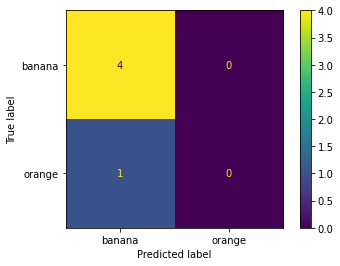

In [94]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier_full, X_test_fs, y_test_fs)

# Feature importance identification using primitive method

In [20]:
#Train and test dataset with features
X_train_f, y_train_f = load_from_tsfile_to_dataframe("haptic_data_5.ts", replace_missing_vals_with='NaN')
X_test_f, y_test_f = load_from_tsfile_to_dataframe("haptic_data_6.ts", replace_missing_vals_with='NaN')

In [10]:
X_train_f

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8
0,0 0.009901 1 0.028431 2 0...,0 0.020382 1 0.059299 2 0.09...,0 1.031202e-02 1 4.378524e-02 2 ...,0 0.00000 1 0.00000 2 0.0015...,0 0.000000 1 -0.000550 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
1,0 0.008854 1 0.026425 2 0...,0 0.018237 1 0.055137 2 0.09...,0 8.536517e-03 1 3.977109e-02 2 ...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000467 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
2,0 0.011421 1 0.030659 2 0...,0 0.023252 1 0.063659 2 0.10...,0 1.243081e-02 1 4.802942e-02 2 ...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000659 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
3,0 0.008961 1 0.026472 2 0...,0 0.018321 1 0.055094 2 0.09...,0 8.602617e-03 1 3.972703e-02 2 ...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000471 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
4,0 0.008880 1 0.026535 2 0...,0 0.020910 1 0.063280 2 0.10...,0 0.009823 1 0.045712 2 0.08...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000470 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
...,...,...,...,...,...,...,...,...,...
153,0 0.009757 1 0.027412 2 0...,0 0.025243 1 0.072911 2 0.12...,0 0.012164 1 0.053076 2 0.09...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000517 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
154,0 0.011365 1 0.030108 2 0...,0 0.033043 1 0.089276 2 0.14...,0 0.017574 1 0.066988 2 0.11...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000639 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
155,0 0.010401 1 0.028223 2 0...,0 0.029891 1 0.083359 2 0.13...,0 1.489789e-02 1 6.124217e-02 2 ...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000556 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
156,0 0.010886 1 0.029127 2 0...,0 0.031541 1 0.086269 2 0.13...,0 0.016262 1 0.064062 2 0.11...,0 0.000000 1 0.000000 2 0.00...,0 0.000000 1 -0.000596 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...


In [20]:

X_train_f_drop_0 = X_train_f.drop(['dim_0'],axis=1)
X_train_f_drop_1 = X_train_f.drop(['dim_1'],axis=1)
X_train_f_drop_2 = X_train_f.drop(['dim_2'],axis=1)
X_train_f_drop_3 = X_train_f.drop(['dim_3'],axis=1)
X_train_f_drop_4 = X_train_f.drop(['dim_4'],axis=1)
X_train_f_drop_5 = X_train_f.drop(['dim_5'],axis=1)
X_train_f_drop_6 = X_train_f.drop(['dim_6'],axis=1)
X_train_f_drop_7 = X_train_f.drop(['dim_7'],axis=1)
X_train_f_drop_8 = X_train_f.drop(['dim_8'],axis=1)

X_test_f_drop_0 = X_test_f.drop(['dim_0'],axis=1)
X_test_f_drop_1 = X_test_f.drop(['dim_1'],axis=1)
X_test_f_drop_2 = X_test_f.drop(['dim_2'],axis=1)
X_test_f_drop_3 = X_test_f.drop(['dim_3'],axis=1)
X_test_f_drop_4 = X_test_f.drop(['dim_4'],axis=1)
X_test_f_drop_5 = X_test_f.drop(['dim_5'],axis=1)
X_test_f_drop_6 = X_test_f.drop(['dim_6'],axis=1)
X_test_f_drop_7 = X_test_f.drop(['dim_7'],axis=1)
X_test_f_drop_8 = X_test_f.drop(['dim_8'],axis=1)

In [21]:
X_test_f_drop_145678

,dim_0,dim_2,dim_3
0,0 0.010289 1 0.028076 2 0...,0 0.010240 1 0.042565 2 0.07...,0 0.00 1 0.00 2 0.00 3 ...
1,0 0.009431 1 0.027050 2 0...,0 0.009044 1 0.040627 2 0.07...,0 0.000 1 0.000 2 0.000 3 ...
2,0 0.010033 1 0.028401 2 0...,0 0.010488 1 0.043723 2 0.07...,0 0.00000 1 0.00000 2 0.0000...
3,0 0.009659 1 0.027353 2 0...,0 0.009339 1 0.041157 2 0.07...,0 0.000 1 0.000 2 0.000 3 ...
4,0 0.009391 1 0.026979 2 0...,0 1.026092e-02 1 4.625505e-02 2 ...,0 0.000 1 0.000 2 0.000 3 ...
...,...,...,...
58,0 0.009509 1 0.027361 2 0...,0 1.213970e-02 1 5.337635e-02 2 ...,0 0.00 1 0.00 2 0.00 3 ...
59,0 0.009438 1 0.026974 2 0...,0 1.285789e-02 1 5.770465e-02 2 ...,0 0.000 1 0.000 2 0.000 3 ...
60,0 0.011113 1 0.029553 2 0...,0 0.016972 1 0.065432 2 0.11...,0 0.00 1 0.00 2 0.00 3 ...
61,0 0.011537 1 0.031464 2 0...,0 0.018068 1 0.070977 2 0.12...,0 0.00 1 0.00 2 0.00 3 ...


# Drop 0 - without time anlysis

In [25]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf1 = Pipeline(steps)
clf1.fit(X_train_f_drop_0, y_train_f)
clf1.score(X_test_f_drop_0, y_test_f)

0.9523809523809523

In [26]:
print(classification_report(y_test_f, clf1.predict(X_test_f_drop_0)))

              precision    recall  f1-score   support

      orange       0.97      0.94      0.95        31
      tomato       0.94      0.97      0.95        32

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63



# Drop 1 - without input force

In [47]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_1, y_train_f)
clf.score(X_test_f_drop_1, y_test_f)

0.9523809523809523

In [48]:
print(classification_report(y_test_f, clf.predict(X_test_f_drop_1)))

              precision    recall  f1-score   support

      orange       0.97      0.94      0.95        31
      tomato       0.94      0.97      0.95        32

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63



# Drop 2 - without force responce

In [49]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_2, y_train_f)
clf.score(X_test_f_drop_2, y_test_f)

0.9523809523809523

In [50]:
print(classification_report(y_test_f, clf.predict(X_test_f_drop_2)))

              precision    recall  f1-score   support

      orange       0.97      0.94      0.95        31
      tomato       0.94      0.97      0.95        32

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63



# Drop 3 - without position feedback

In [29]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_3, y_train_f)
clf.score(X_test_f_drop_3, y_test_f)


0.9523809523809523

In [30]:
print(classification_report(y_test_f, clf.predict(X_test_f_drop_3)))

              precision    recall  f1-score   support

      orange       0.97      0.94      0.95        31
      tomato       0.94      0.97      0.95        32

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63



# Drop 4 - without Velocity

In [27]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_4, y_train_f)
clf.score(X_test_f_drop_4, y_test_f)


0.9841269841269841

In [28]:
print(classification_report(y_test_f, clf.predict(X_test_f_drop_4)))

              precision    recall  f1-score   support

      orange       0.97      1.00      0.98        31
      tomato       1.00      0.97      0.98        32

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



# Drop 5 - without accleration feedback

In [31]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_5, y_train_f)
clf.score(X_test_f_drop_5, y_test_f)


0.9523809523809523

In [32]:
print(classification_report(y_test_f, clf.predict(X_test_f_drop_5)))

              precision    recall  f1-score   support

      orange       0.97      0.94      0.95        31
      tomato       0.94      0.97      0.95        32

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63



# Drop 6 - without stiffness feedback

In [34]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_6, y_train_f)
clf.score(X_test_f_drop_6, y_test_f)


0.9523809523809523

In [35]:
print(classification_report(y_test_f, clf.predict(X_test_f_drop_6)))

              precision    recall  f1-score   support

      orange       0.97      0.94      0.95        31
      tomato       0.94      0.97      0.95        32

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63



# Drop 7 - without viscussness feedback

In [38]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_7, y_train_f)
clf.score(X_test_f_drop_7, y_test_f)


0.9523809523809523

In [39]:
print(classification_report(y_test_f, clf.predict(X_test_f_drop_7)))

              precision    recall  f1-score   support

      orange       0.97      0.94      0.95        31
      tomato       0.94      0.97      0.95        32

    accuracy                           0.95        63
   macro avg       0.95      0.95      0.95        63
weighted avg       0.95      0.95      0.95        63



# Drop 8 - without energy absorbed feedback

In [42]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_8, y_train_f)
clf.score(X_test_f_drop_8, y_test_f)


0.8571428571428571

In [43]:
print(classification_report(y_test_f, clf.predict(X_test_f_drop_8)))

              precision    recall  f1-score   support

      orange       0.79      0.97      0.87        31
      tomato       0.96      0.75      0.84        32

    accuracy                           0.86        63
   macro avg       0.87      0.86      0.86        63
weighted avg       0.88      0.86      0.86        63



In [48]:
print(classification_report(y_test_f, clf.predict(X_test_f_drop_01234567)))

              precision    recall  f1-score   support

      orange       0.91      0.94      0.92        31
      tomato       0.94      0.91      0.92        32

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



# 3 and 8 only, others dropped

In [51]:
X_train_f_drop_0124567 = X_train_f.drop(['dim_0','dim_1','dim_2','dim_4','dim_5','dim_6','dim_7'],axis=1)
X_test_f_drop_0124567 = X_test_f.drop(['dim_0','dim_1','dim_2','dim_4','dim_5','dim_6','dim_7'],axis=1)

In [52]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_0124567 , y_train_f)
clf.score(X_test_f_drop_0124567, y_test_f) 

0.8888888888888888

# STAGE 2 
# With only 1 feature

# 0 only, others dropped

In [66]:
X_train_f_drop_12345678 = X_train_f.drop(['dim_1','dim_2','dim_3','dim_4','dim_5','dim_6','dim_7','dim_8'],axis=1)
X_test_f_drop_12345678 = X_test_f.drop(['dim_1','dim_2','dim_3','dim_4','dim_5','dim_6','dim_7','dim_8'],axis=1)

In [67]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_12345678 , y_train_f)
clf.score(X_test_f_drop_12345678, y_test_f) 

0.5396825396825397

# 1 only, others dropped


In [72]:
X_train_f_drop_02345678 = X_train_f.drop(['dim_0','dim_2','dim_3','dim_4','dim_5','dim_6','dim_7','dim_8'],axis=1)
X_test_f_drop_02345678 = X_test_f.drop(['dim_0','dim_2','dim_3','dim_4','dim_5','dim_6','dim_7','dim_8'],axis=1)

In [73]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_02345678 , y_train_f)
clf.score(X_test_f_drop_02345678, y_test_f) 

0.5238095238095238

# 2 only, others dropped

In [54]:
X_train_f_drop_01345678 = X_train_f.drop(['dim_0','dim_1','dim_3','dim_4','dim_5','dim_6','dim_7','dim_8'],axis=1)
X_test_f_drop_01345678 = X_test_f.drop(['dim_0','dim_1','dim_3','dim_4','dim_5','dim_6','dim_7','dim_8'],axis=1)

In [55]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_01345678 , y_train_f)
clf.score(X_test_f_drop_01345678, y_test_f) 

0.8412698412698413

# 3 only, others dropped

In [49]:
X_train_f_drop_01245678 = X_train_f.drop(['dim_0','dim_1','dim_2','dim_4','dim_5','dim_6','dim_7','dim_8'],axis=1)
X_test_f_drop_01245678 = X_test_f.drop(['dim_0','dim_1','dim_2','dim_4','dim_5','dim_6','dim_7','dim_8'],axis=1)

In [50]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_01245678 , y_train_f)
clf.score(X_test_f_drop_01245678, y_test_f) 

0.9047619047619048

In [ ]:
print(classification_report(y_test_f, clf.predict(X_test_f_drop_01245678)))

# 4 only, others dropped

In [56]:
X_train_f_drop_01235678 = X_train_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_5','dim_6','dim_7','dim_8'],axis=1)
X_test_f_drop_01235678 = X_test_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_5','dim_6','dim_7','dim_8'],axis=1)

In [57]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_01235678 , y_train_f)
clf.score(X_test_f_drop_01235678, y_test_f) 

0.8095238095238095

# 5 only, others dropped

In [58]:
X_train_f_drop_01234678 = X_train_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_4','dim_6','dim_7','dim_8'],axis=1)
X_test_f_drop_01234678 = X_test_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_4','dim_6','dim_7','dim_8'],axis=1)

In [59]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_01234678 , y_train_f)
clf.score(X_test_f_drop_01234678, y_test_f) 

0.49206349206349204

# 6 only, others dropped

In [60]:
X_train_f_drop_01234578 = X_train_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_4','dim_5','dim_7','dim_8'],axis=1)
X_test_f_drop_01234578 = X_test_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_4','dim_5','dim_7','dim_8'],axis=1)

In [61]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_01234578 , y_train_f)
clf.score(X_test_f_drop_01234578, y_test_f) 

0.49206349206349204

# 7 only, others dropped

In [62]:
X_train_f_drop_01234568 = X_train_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_4','dim_5','dim_6','dim_8'],axis=1)
X_test_f_drop_01234568 = X_test_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_4','dim_5','dim_6','dim_8'],axis=1)

In [63]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_01234568 , y_train_f)
clf.score(X_test_f_drop_01234568, y_test_f) 

0.49206349206349204

# Only 8 others droped

In [45]:
X_train_f_drop_01234567 = X_train_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_4','dim_5','dim_6','dim_7'],axis=1)
X_test_f_drop_01234567 = X_test_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_4','dim_5','dim_6','dim_7'],axis=1)

In [47]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train_f_drop_01234567 , y_train_f)
clf.score(X_test_f_drop_01234567, y_test_f) 

0.9206349206349206

# Stage 3
## Only with 2 paremeters

In [ ]:
X_train_f_drop_01234567 = X_train_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_4','dim_5','dim_6','dim_7','dim_8'],axis=1)
X_test_f_drop_01234567 = X_test_f.drop(['dim_0','dim_1','dim_2','dim_3','dim_4','dim_5','dim_6','dim_7','dim_8'],axis=1)

In [84]:
dim = ['dim_0','dim_1','dim_2','dim_3','dim_4','dim_5','dim_6','dim_7','dim_8']

In [107]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)


for x in range (0,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    for y in range (x+1,9):
        X_train_f_drop_X = X_train_f.drop(dim[y],axis=1)
        X_test_f_drop_X = X_test_f.drop(dim[y],axis=1)
        print(dim[x],dim[y])
        #clf.fit(X_train_f_drop_X , y_train_f)
        #print(clf.score(X_test_f_drop_X, y_test_f))
        
        
        

dim_0 dim_1
dim_0 dim_2
dim_0 dim_3
dim_0 dim_4
dim_0 dim_5
dim_0 dim_6
dim_0 dim_7
dim_0 dim_8
dim_1 dim_2
dim_1 dim_3
dim_1 dim_4
dim_1 dim_5
dim_1 dim_6
dim_1 dim_7
dim_1 dim_8
dim_2 dim_3
dim_2 dim_4
dim_2 dim_5
dim_2 dim_6
dim_2 dim_7
dim_2 dim_8
dim_3 dim_4
dim_3 dim_5
dim_3 dim_6
dim_3 dim_7
dim_3 dim_8
dim_4 dim_5
dim_4 dim_6
dim_4 dim_7
dim_4 dim_8
dim_5 dim_6
dim_5 dim_7
dim_5 dim_8
dim_6 dim_7
dim_6 dim_8
dim_7 dim_8


# Feature imporance plot 


calculated in colab file haptic 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size":14})
    
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})


In [46]:
import pandas as pd
df1 = pd.DataFrame({'name': ['Force Command', 'Force Response', 'Position','Velocity','Acceleration','Stiffness','Viscousness','Energy absorbed'], 
                   'FI': [0.0125, -0.025, -0.0125, 0, 0, 0.014286, -0.025, 0.091071]})

df2 = pd.DataFrame({'name': ['Force Command', 'Force Response', 'Position','Velocity','Acceleration','Stiffness','Viscousness','Energy absorbed'], 
                   'FI': [0.009289, 0.000198, 0.000198, -0.004348, -0.004348, 0.000198, -0.004348, 0.022135]})


<Figure size 432x288 with 0 Axes>

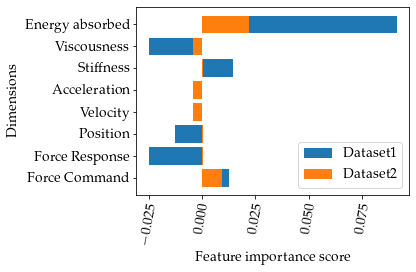

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.figure(tight_layout=(1,0,1,1))
#plt.figure(figsize=(9.1,9.7))
#text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
plt.barh(df1['name'],df1['FI'],label='Dataset1')
plt.barh(df2['name'],df2['FI'],label='Dataset2')
plt.xlabel("Feature importance score")
plt.xticks(rotation=80)
plt.legend()
plt.ylabel("Dimensions")

plt.savefig('Fig_26_FI_barchart_5.pdf')
plt.show()


<Figure size 432x288 with 0 Axes>

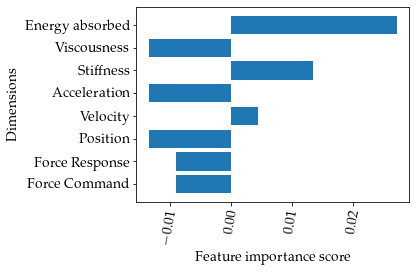

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.figure(tight_layout=(1,0,1,1))
#plt.figure(figsize=(9.1,9.7))
#text_kwargs = dict(ha='center', va='center', fontsize=28, color='C1')
plt.barh(df2['name'],df2['FI'])
plt.xlabel("Feature importance score")
plt.xticks(rotation=80)
plt.ylabel("Dimensions")

#plt.savefig('Fig_26_FI_barchart_4.png',dpi=400)
plt.show()


# Re plot of Confution matrix with features classfication with 10 fold cross validataion - in "viridis" or "Blues"

In [3]:
# Latex fornts for plotting

import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size":14})
    
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})


In [4]:
#Train and test dataset without features
X_train, y_train = load_from_tsfile_to_dataframe("haptic_data_3.ts", replace_missing_vals_with='NaN')
X_test, y_test = load_from_tsfile_to_dataframe("haptic_data_4.ts", replace_missing_vals_with='NaN')


In [52]:
#Train and test dataset with features
X_train_f, y_train_f = load_from_tsfile_to_dataframe("haptic_data_5.ts", replace_missing_vals_with='NaN')
X_test_f, y_test_f = load_from_tsfile_to_dataframe("haptic_data_6.ts", replace_missing_vals_with='NaN')

In [53]:
# concatinate datasets without featurs
#X_all = pd.concat([X_train,X_test], axis=0)
#y_all = np.concatenate([y_train,y_test], axis=0)

# Concatinate datasets with features
X_f_all = pd.concat([X_train_f,X_test_f], axis=0)
y_f_all = np.concatenate([y_train_f,y_test_f], axis=0)

### With features test

In [54]:
# randamize the data 

X_train_f_rand, X_test_f_rand, y_train_f_rand, y_test_f_rand = train_test_split(X_f_all, y_f_all, test_size=.01, random_state=42)

# for classfication we using 
print(X_train_f_rand.shape)
print(y_train_f_rand.shape)

(218, 9)
(218,)


In [56]:
X_all_rand = pd.concat([X_train_f_rand,X_test_f_rand], axis=0)
y_all_rand = np.concatenate([y_train_f_rand,y_test_f_rand], axis=0)

print(X_all_rand.shape)
print(y_all_rand.shape)

(221, 9)
(221,)


In [58]:
# model

steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=60)),]
clf = Pipeline(steps)

In [59]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

# prediction 
y_pred = cross_val_predict(clf, X_all_rand, y_all_rand, cv=10)
# confuiton matrix from predictions
conf_mat = confusion_matrix(y_all_rand, y_pred)



In [60]:
# print confution matrix in row format
print(conf_mat)

[[101  10]
 [  4 106]]


In [ ]:
# Cross validation score calcuation
cv_results = cross_validate(clf, X_all_rand, y_all_rand, cv=10)

In [12]:
# cross validation score calculation
cv_report  = pd.DataFrame(cv_results)
cv_report['test_score']

0    0.90
1    0.90
2    0.80
3    1.00
4    0.90
5    0.95
6    0.95
7    0.85
8    1.00
9    1.00
Name: test_score, dtype: float64

In [13]:
Score = 0.925

In [12]:
import seaborn as sns
#plot confution matrix with featurs
ax = sns.heatmap(conf_mat, annot=True, cmap='viridis')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted lable')
ax.set_ylabel('Ture lable ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['orange','tomato'])
ax.yaxis.set_ticklabels(['orange','tomato'])

## Display the visualization of the Confusion Matrix.
plt.savefig('Fig_25_conf_matrix_with_features_10fCV.png',dpi=400)
plt.show()

NameError: name 'conf_mat' is not defined

### Without featres

In [16]:
X_train_f_rand_drop = X_all_rand.drop(['dim_4','dim_5','dim_6','dim_7','dim_8'],axis=1)

In [18]:
X_train_f_rand_drop

,dim_0,dim_1,dim_2,dim_3
25,0 0.011078 1 0.029485 2 0...,0 0.028765 1 0.078467 2 0.12...,0 0.014936 1 0.058464 2 0.10...,0 0.0 1 0.0 2 0.0 3 0....
127,0 0.008836 1 0.026251 2 0...,0 0.018174 1 0.054746 2 0.09...,0 0.008494 1 0.039393 2 0.07...,0 0.00 1 0.00 2 0.00 3 ...
43,0 0.010685 1 0.028628 2 0...,0 0.030882 1 0.084715 2 0.13...,0 0.015685 1 0.062552 2 0.11...,0 0.00 1 0.00 2 0.00 3 ...
97,0 0.009649 1 0.027201 2 0...,0 0.019464 1 0.056325 2 0.09...,0 0.009334 1 0.040911 2 0.07...,0 0.000 1 0.000 2 0.000 3 ...
16,0 0.008862 1 0.026434 2 0...,0 0.018278 1 0.055179 2 0.09...,0 8.578290e-03 1 3.981076e-02 2 ...,0 0.0 1 0.0 2 0.0 3 0....
...,...,...,...,...
106,0 0.011136 1 0.029679 2 0...,0 0.029138 1 0.079207 2 0.12...,0 0.015276 1 0.059180 2 0.10...,0 0.00 1 0.00 2 0.00 3 ...
14,0 0.008996 1 0.026621 2 0...,0 0.026573 1 0.079446 2 0.13...,0 0.012552 1 0.057462 2 0.10...,0 0.00 1 0.00 2 0.00 3 ...
92,0 0.010603 1 0.028651 2 0...,0 0.030633 1 0.084779 2 0.13...,0 0.015481 1 0.062614 2 0.11...,0 0.00 1 0.00 2 0.00 3 ...
21,0 0.011033 1 0.029364 2 0...,0 0.025564 1 0.069563 2 0.11...,0 0.013290 1 0.051781 2 0.09...,0 0.000 1 0.000 2 0.000 3 ...


In [21]:
# prediction 
y_pred_noF = cross_val_predict(clf, X_train_f_rand_drop, y_train_f_rand, cv=10)
# confuiton matrix from predictions
conf_mat_noF = confusion_matrix(y_train_f_rand, y_pred_noF)

# Cross validation score calcuation
cv_results = cross_validate(clf, X_train_f_rand_drop, y_train_f_rand, cv=10)

In [22]:
# cross validation score calculation
cv_report  = pd.DataFrame(cv_results)
cv_report['test_score']

0    0.750000
1    0.850000
2    0.800000
3    0.900000
4    0.950000
5    1.000000
6    0.950000
7    0.850000
8    0.947368
9    0.947368
Name: test_score, dtype: float64

In [26]:
Score = 0.8944

In [27]:
# print confution matrix in row format
print(conf_mat_noF)

[[92  9]
 [ 8 89]]


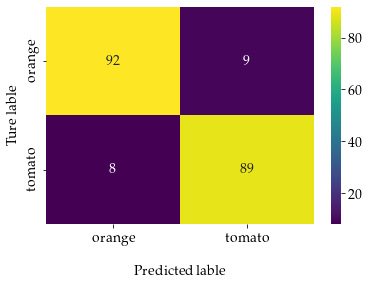

In [28]:
import seaborn as sns
#plot confution matrix with featurs
ax = sns.heatmap(conf_mat_noF, annot=True, cmap='YlGn')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted lable')
ax.set_ylabel('Ture lable ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['orange','tomato'])
ax.yaxis.set_ticklabels(['orange','tomato'])

## Display the visualization of the Confusion Matrix.
plt.savefig('Fig_24_conf_matrix_with_no_features_10fCV.png',dpi=400)
plt.show()

# With importne features - without only dim_7


In [50]:
X_f_all_rand_drop = X_train_f_rand.drop(['dim_2'],axis=1)

In [51]:
X_f_all_rand_drop.head()

,dim_0,dim_1,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8
25,0 0.011078 1 0.029485 2 0...,0 0.028765 1 0.078467 2 0.12...,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 -0.000612 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
127,0 0.008836 1 0.026251 2 0...,0 0.018174 1 0.054746 2 0.09...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000462 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
43,0 0.010685 1 0.028628 2 0...,0 0.030882 1 0.084715 2 0.13...,0 0.00 1 0.00 2 0.00 3 ...,0 0.000000 1 -0.000575 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
97,0 0.009649 1 0.027201 2 0...,0 0.019464 1 0.056325 2 0.09...,0 0.000 1 0.000 2 0.000 3 ...,0 0.000000 1 -0.000508 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...
16,0 0.008862 1 0.026434 2 0...,0 0.018278 1 0.055179 2 0.09...,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 -0.000467 2 ...,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.0 1 0.0 2 0.0 3 0....,0 0.000000 1 0.000000 2 0...


In [47]:
# prediction 
y_pred_noF = cross_val_predict(clf, X_f_all_rand_drop, y_train_f_rand, cv=10)
# confuiton matrix from predictions
conf_mat_noF = confusion_matrix(y_train_f_rand, y_pred_noF)

# Cross validation score calcuation
cv_results = cross_validate(clf, X_f_all_rand_drop, y_train_f_rand, cv=10)

In [48]:
# cross validation score calculation
cv_report  = pd.DataFrame(cv_results)
cv_report['test_score']

0    0.850000
1    0.900000
2    0.750000
3    1.000000
4    0.950000
5    0.950000
6    0.950000
7    0.850000
8    1.000000
9    0.947368
Name: test_score, dtype: float64

In [ ]:
Score =

In [3]:
# print confution matrix in row format
conf_mat_noF

NameError: name 'conf_mat_noF' is not defined

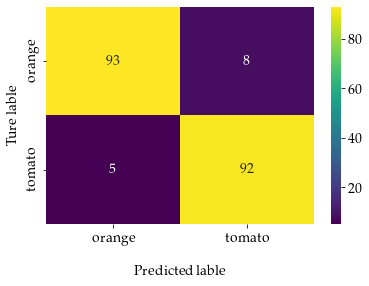

In [39]:
import seaborn as sns
#plot confution matrix with featurs
ax = sns.heatmap(conf_mat_noF, annot=True, cmap='YlGn')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted lable')
ax.set_ylabel('Ture lable ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['orange','tomato'])
ax.yaxis.set_ticklabels(['orange','tomato'])

## Display the visualization of the Confusion Matrix.
plt.savefig('Fig_27_conf_matrix_with_importent_features_10fCV.png',dpi=400)
plt.show()

# Print the confution matrix

In [72]:
conf_mat_noF = [[99., 10], [4,106.0]]


In [70]:
conf_mat_noF

[[101.0, 10], [4, 106.0]]

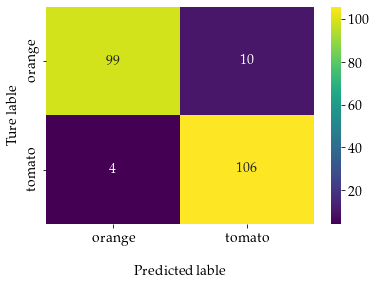

In [78]:
import seaborn as sns
#plot confution matrix with featurs
ax = sns.heatmap(conf_mat_noF, annot=True, fmt='g',cmap='YlGn')

#ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted lable')
ax.set_ylabel('Ture lable ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['orange','tomato'])
ax.yaxis.set_ticklabels(['orange','tomato'])

## Display the visualization of the Confusion Matrix.
#plt.savefig('Fig_27_conf_matrix_with_importent_features_10fCV.png',dpi=400)
plt.show()

## Dataset 1 Confution matrix plot without feature 

In [4]:
conf_mat_MF = [[12,  4,  0,  0,  0], [ 2, 14,  0,  0,  0], [ 0,  0, 16,  0,  0], [ 2,  0,  0, 12,  1], [ 0,  0,  0,  0, 15]]


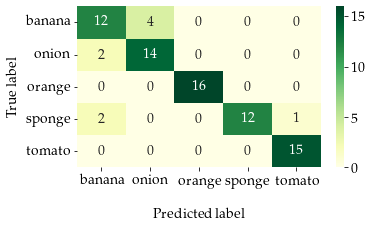

In [5]:
import seaborn as sns
#plot confution matrix with featurs
ax = sns.heatmap(conf_mat_MF, annot=True, fmt='g',cmap='YlGn')
#plt.figure(tight_layout=(0,0,1,1))
#ax.set_title('Seaborn Confusion Matrix with labels\n\n');

plt.tight_layout(pad=3.8)
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ');



## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['banana','onion','orange','sponge','tomato'])
ax.yaxis.set_ticklabels(['banana','onion','orange','sponge','tomato'], rotation=0)

## Display the visualization of the Confusion Matrix.
plt.savefig('Fig_22_conf_mat_no_features_10fcv.pdf')
plt.show()

# Dataset 2 No features classifciation CM

In [6]:
conf_mat_MF = [[100,  11], [  7, 103]]


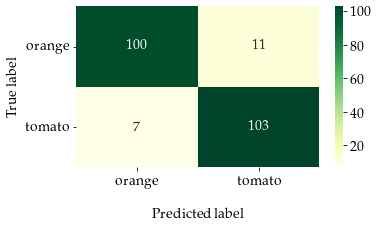

In [7]:
import seaborn as sns
#plot confution matrix with featurs
ax = sns.heatmap(conf_mat_MF, annot=True, fmt='g',cmap='YlGn')
#plt.figure(tight_layout=(0,0,1,1))
#ax.set_title('Seaborn Confusion Matrix with labels\n\n');

plt.tight_layout(pad=3.8)

ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ');


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['orange','tomato'])
ax.yaxis.set_ticklabels(['orange','tomato'], rotation=0)

## Display the visualization of the Confusion Matrix.
plt.savefig('Fig_24_conf_mat_no_features_10fcv_D2.pdf')
plt.show()

## Dataset 1 with features confution matrix

In [8]:
conf_mat = [[15,  1,  0,  0,  0],
       [ 0, 16,  0,  0,  0],
       [ 0,  0, 16,  0,  0],
       [ 0,  0,  0, 14,  1],
       [ 0,  0,  0,  0, 15]]

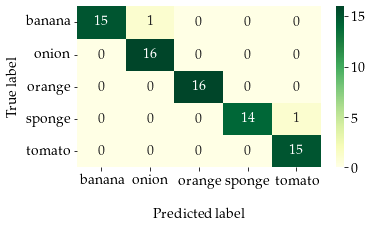

In [9]:
import seaborn as sns
#plot confution matrix with featurs
ax = sns.heatmap(conf_mat, annot=True, fmt='g',cmap='YlGn')
#plt.figure(tight_layout=(0,0,1,1))
#ax.set_title('Seaborn Confusion Matrix with labels\n\n');

plt.tight_layout(pad=3.8)

ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ');



## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['banana','onion','orange','sponge','tomato'])
ax.yaxis.set_ticklabels(['banana','onion','orange','sponge','tomato'], rotation=0)

## Display the visualization of the Confusion Matrix.
plt.savefig('Fig_23_conf_mat_with_features_10fcv.pdf')
plt.show()

## Dataset 2 with features classfication accurasy 

In [10]:
conf_mat = [[102,   9],[  5, 105]]

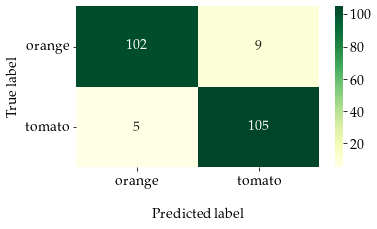

In [11]:
import seaborn as sns
#plot confution matrix with featurs
ax = sns.heatmap(conf_mat, annot=True, fmt='g',cmap='YlGn')
#plt.figure(tight_layout=(0,0,1,1))
#ax.set_title('Seaborn Confusion Matrix with labels\n\n');

plt.tight_layout(pad=3.8)

ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ');


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['orange','tomato'])
ax.yaxis.set_ticklabels(['orange','tomato'], rotation=0)

## Display the visualization of the Confusion Matrix.
plt.savefig('Fig_25_conf_mat_with_features_10fcv_D2.pdf')
plt.show()

# Dataset1 with importent features only

In [12]:
conf_mat_IF = [[14,  2,  0,  0,  0],
       [ 0, 16,  0,  0,  0],
       [ 0,  0, 16,  0,  0],
       [ 0,  0,  0, 14,  1],
       [ 0,  0,  0,  1, 14]]

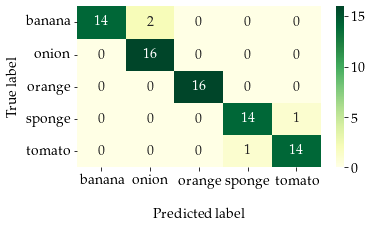

In [13]:
import seaborn as sns
#plot confution matrix with featurs
ax = sns.heatmap(conf_mat_IF, annot=True, fmt='g',cmap='YlGn')
#plt.figure(tight_layout=(0,0,1,1))
#ax.set_title('Seaborn Confusion Matrix with labels\n\n');

plt.tight_layout(pad=3.8)
ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ');



## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['banana','onion','orange','sponge','tomato'])
ax.yaxis.set_ticklabels(['banana','onion','orange','sponge','tomato'], rotation=0)

## Display the visualization of the Confusion Matrix.
plt.savefig('Fig_27_conf_mat_with_Importent_features_10fcv.pdf')
plt.show()

# Dataset2 with importent feature without dim_4


In [14]:
conf_mat_IF = [[102,   9],[  5, 105]]

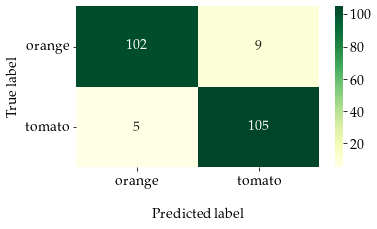

In [15]:
import seaborn as sns
#plot confution matrix with featurs
ax = sns.heatmap(conf_mat, annot=True, fmt='g',cmap='YlGn')
#plt.figure(tight_layout=(0,0,1,1))
#ax.set_title('Seaborn Confusion Matrix with labels\n\n');

plt.tight_layout(pad=3.8)

ax.set_xlabel('\nPredicted label')
ax.set_ylabel('True label ');


## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['orange','tomato'])
ax.yaxis.set_ticklabels(['orange','tomato'], rotation=0)

## Display the visualization of the Confusion Matrix.
plt.savefig('Fig_28_conf_mat_with_Impotent_features_10fcv_D2.pdf')
plt.show()

# Permutation Importance Method

Calculate classification accurasy using every permutation of dataset and calculate the accurasy 

In [2]:
#Train and test dataset with features
X_train_f, y_train_f = load_from_tsfile_to_dataframe("haptic_data_7.ts", replace_missing_vals_with='NaN')
X_test_f, y_test_f = load_from_tsfile_to_dataframe("haptic_data_8.ts", replace_missing_vals_with='NaN')

In [3]:
# featur names get in to array

dim = ['dim_0','dim_1','dim_2','dim_3','dim_4','dim_5','dim_6','dim_7','dim_8']

# creating pipeline 

steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)



In [4]:
print ( X_train_f.shape , X_test_f.shape, y_train_f.shape, y_test_f.shape )

(157, 9) (64, 9) (157,) (64,)


In [6]:
csv_name = "pout23.csv"

In [7]:
# 1

x = 1

pos0 = 1 #time
pos1 = 1
pos2 = 1
pos3 = 1
pos4 = 1
pos5 = 1
pos6 = 1
pos7 = 1
pos8 = 1

a = 0
for x in range (1,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    if (x == 1):
        pos1 = 0 # force command
    if (x == 2):
        pos2 = 0 # force responce
    if (x == 3):
        pos3 = 0 # Position
    if (x == 4):
        pos4 = 0 # velocity
    if (x == 5):
        pos5 = 0 # accleration
    if (x == 6):
        pos6 = 0 # stiffness
    if (x == 7):
        pos7 = 0 # viscosity
    if (x == 8):
        pos8 = 0 # Energy absorbed     
    index = pos0 + pos1*2 + pos2*4 + pos3*8 + pos4*16 + pos5*32 + pos6*64 + pos7*128 + pos8*256
    clf.fit(X_train_f_drop_X , y_train_f)
    filePointer = open(csv_name,'a')
    writer = csv.writer(filePointer)
    data = [a, index, pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8,  clf.score(X_test_f_drop_X, y_test_f)]
    writer.writerow(data)
    filePointer.close()
    print(data)
    a=a+1
    pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1

[0, 509, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0.46875]
[1, 507, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0.46875]
[2, 503, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0.484375]
[3, 495, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0.734375]
[4, 479, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0.515625]
[5, 447, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0.53125]
[6, 383, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0.515625]
[7, 255, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0.3125]


In [8]:
# 2

x = 0
y = 0
z = 0
p = 0
q = 0
r = 0

pos0 = 1 #time
pos1 = 1
pos2 = 1
pos3 = 1
pos4 = 1
pos5 = 1
pos6 = 1
pos7 = 1
pos8 = 1

a = 0
for x in range (1,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    for y in range (x+1,9):
        X_train_f_drop_X = X_train_f.drop(dim[y],axis=1)
        X_test_f_drop_X = X_test_f.drop(dim[y],axis=1)
        if (x == 1 or y == 1 or z == 1 or p == 1 or q == 1 ):
            pos1 = 0 # force command
        if (x == 2 or y == 2 or z == 2 or p == 2 or q == 2 ):
            pos2 = 0 # force responce
        if (x == 3 or y == 3 or z == 3 or p == 3 or q == 3  ):
            pos3 = 0 # Position
        if (x == 4 or y == 4 or z == 4 or p == 4 or q == 4 ):
            pos4 = 0 # velocity
        if (x == 5 or y == 5 or z == 5 or p == 5 or q == 5 ):
            pos5 = 0 # accleration
        if (x == 6 or y == 6 or z == 6 or p == 6 or q == 6 ):
            pos6 = 0 # stiffness
        if (x == 7 or y == 7 or z == 7 or p == 7 or q == 7 ):
            pos7 = 0 # viscosity
        if (x == 8 or y == 8 or z == 8 or p == 8 or q == 8 ):
            pos8 = 0 # Energy absorbed
        index = pos0 + pos1*2 + pos2*4 + pos3*8 + pos4*16 + pos5*32 + pos6*64 + pos7*128 + pos8*256
        clf.fit(X_train_f_drop_X , y_train_f)
        filePointer = open(csv_name,'a')
        writer = csv.writer(filePointer)
        data = [a, index, pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8,  clf.score(X_test_f_drop_X, y_test_f)]
        writer.writerow(data)
        filePointer.close()
        print(data)
        a=a+1
        pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1      

[0, 505, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0.484375]
[1, 501, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0.484375]
[2, 493, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0.671875]
[3, 477, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0.53125]
[4, 445, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0.5]
[5, 381, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0.5]
[6, 253, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0.328125]
[7, 499, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0.484375]
[8, 491, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0.625]
[9, 475, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0.515625]
[10, 443, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0.515625]
[11, 379, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0.515625]
[12, 251, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0.3125]
[13, 487, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0.734375]
[14, 471, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0.53125]
[15, 439, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0.53125]
[16, 375, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0.53125]
[17, 247, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0.3125]
[18, 463, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0.53125]
[19, 431, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0.5]
[20, 367, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0.53125]
[21, 239, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0.34375]
[22, 

In [9]:
# 3

x = 0
y = 0
z = 0
p = 0
q = 0
r = 0

pos0 = 1 #time
pos1 = 1
pos2 = 1
pos3 = 1
pos4 = 1
pos5 = 1
pos6 = 1
pos7 = 1
pos8 = 1

a = 0
for x in range (1,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    for y in range (x+1,9):
        X_train_f_drop_X = X_train_f.drop(dim[y],axis=1)
        X_test_f_drop_X = X_test_f.drop(dim[y],axis=1)
        for z in range (y+1,9):
            X_train_f_drop_X = X_train_f.drop(dim[z],axis=1)
            X_test_f_drop_X = X_test_f.drop(dim[z],axis=1)
            if (x == 1 or y == 1 or z == 1 or p == 1 or q == 1 ):
                pos1 = 0 # force command
            if (x == 2 or y == 2 or z == 2 or p == 2 or q == 2 ):
                pos2 = 0 # force responce
            if (x == 3 or y == 3 or z == 3 or p == 3 or q == 3  ):
                pos3 = 0 # Position
            if (x == 4 or y == 4 or z == 4 or p == 4 or q == 4 ):
                pos4 = 0 # velocity
            if (x == 5 or y == 5 or z == 5 or p == 5 or q == 5 ):
                pos5 = 0 # accleration
            if (x == 6 or y == 6 or z == 6 or p == 6 or q == 6 ):
                pos6 = 0 # stiffness
            if (x == 7 or y == 7 or z == 7 or p == 7 or q == 7 ):
                pos7 = 0 # viscosity
            if (x == 8 or y == 8 or z == 8 or p == 8 or q == 8 ):
                pos8 = 0 # Energy absorbed
            index = pos0 + pos1*2 + pos2*4 + pos3*8 + pos4*16 + pos5*32 + pos6*64 + pos7*128 + pos8*256
            clf.fit(X_train_f_drop_X , y_train_f)
            filePointer = open(csv_name,'a')
            writer = csv.writer(filePointer)
            data = [a, index, pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8,  clf.score(X_test_f_drop_X, y_test_f)]
            writer.writerow(data)
            filePointer.close()
            print(data)
            a=a+1
            pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1

[0, 497, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0.484375]
[1, 489, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0.71875]
[2, 473, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0.515625]
[3, 441, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0.53125]
[4, 377, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0.515625]
[5, 249, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0.296875]
[6, 485, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0.734375]
[7, 469, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0.53125]
[8, 437, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0.5]
[9, 373, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0.515625]
[10, 245, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0.3125]
[11, 461, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0.484375]
[12, 429, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0.5]
[13, 365, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0.5]
[14, 237, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0.328125]
[15, 413, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0.546875]
[16, 349, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0.515625]
[17, 221, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0.296875]
[18, 317, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0.5]
[19, 189, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0.3125]
[20, 125, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0.296875]
[21, 483, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0.703125]
[22

In [ ]:
# 4

x = 0
y = 0
z = 0
p = 0
q = 0
r = 0

pos0 = 1 #time
pos1 = 1
pos2 = 1
pos3 = 1
pos4 = 1
pos5 = 1
pos6 = 1
pos7 = 1
pos8 = 1


a = 0
for x in range (1,9):
    X_train_f_drop_X = X_train_f.drop(dim[x],axis=1)
    X_test_f_drop_X = X_test_f.drop(dim[x],axis=1)
    for y in range (x+1,9):
        X_train_f_drop_X = X_train_f.drop(dim[y],axis=1)
        X_test_f_drop_X = X_test_f.drop(dim[y],axis=1)
        for z in range (y+1,9):
            X_train_f_drop_X = X_train_f.drop(dim[z],axis=1)
            X_test_f_drop_X = X_test_f.drop(dim[z],axis=1)
            for p in range (z+1,9):
                X_train_f_drop_X = X_train_f.drop(dim[p],axis=1)
                X_test_f_drop_X = X_test_f.drop(dim[p],axis=1)
                if (x == 1 or y == 1 or z == 1 or p == 1 or q == 1 ):
                    pos1 = 0 # force command
                if (x == 2 or y == 2 or z == 2 or p == 2 or q == 2 ):
                    pos2 = 0 # force responce
                if (x == 3 or y == 3 or z == 3 or p == 3 or q == 3  ):
                    pos3 = 0 # Position
                if (x == 4 or y == 4 or z == 4 or p == 4 or q == 4 ):
                    pos4 = 0 # velocity
                if (x == 5 or y == 5 or z == 5 or p == 5 or q == 5 ):
                    pos5 = 0 # accleration
                if (x == 6 or y == 6 or z == 6 or p == 6 or q == 6 ):
                    pos6 = 0 # stiffness
                if (x == 7 or y == 7 or z == 7 or p == 7 or q == 7 ):
                    pos7 = 0 # viscosity
                if (x == 8 or y == 8 or z == 8 or p == 8 or q == 8 ):
                    pos8 = 0 # Energy absorbed
                index = pos0 + pos1*2 + pos2*4 + pos3*8 + pos4*16 + pos5*32 + pos6*64 + pos7*128 + pos8*256
                clf.fit(X_train_f_drop_X , y_train_f)
                filePointer = open(csv_name,'a')
                writer = csv.writer(filePointer)
                data = [a, index, pos0, pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8,  clf.score(X_test_f_drop_X, y_test_f)]
                writer.writerow(data)
                filePointer.close()
                print(data)
                a=a+1
                pos0 = pos1 = pos2 = pos3 = pos4 = pos5 = pos6 = pos7 = pos8 = 1

[0, 481, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0.6875]
